# Making a bar graph in plotnine

## Basic bar chart

Making a bar graph in plotnine is a tiny bit more difficult than other charts.

Usually you'll want your data organized up so that each row will be its own bar. In this dataset, each type of animal is going to get its own bar:

In [145]:
import pandas as pd
from plotnine import *

df = pd.DataFrame([
    { 'species': 'cat', 'num_animals': 8 },
    { 'species': 'dog', 'num_animals': 22 },
    { 'species': 'rabbit', 'num_animals': 2 },
])
df

,species,num_animals
0,cat,8
1,dog,22
2,rabbit,2


When we plot, we use `geom_bar` to plot a bar. 

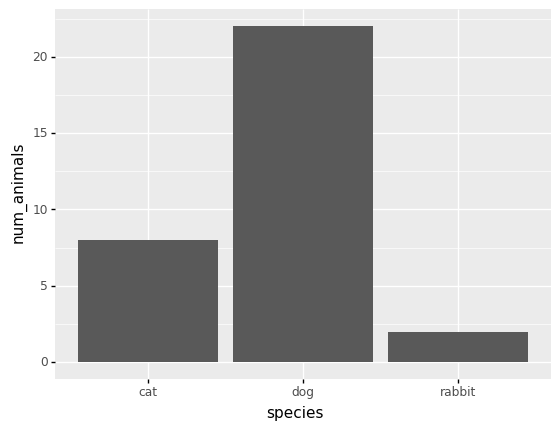

<ggplot: (325275832)>

In [146]:
(
    ggplot(df)
    + aes(x='species', y='num_animals')
    + geom_bar(stat='identity')
)

The little extra bit we added was `stat='identity'`. It means "just plot the y axis like you would expect it to be plotted."

What's the alternative?? Glad you asked!

## Aggregate bar chart (median)

A lot of the time your data isn't set up like you want it to be set up. Say for example we have a bunch of countries with life expectancies. Want we want to plot is different, though: we want the median life expectancy per continent.

In [90]:
import pandas as pd
from plotnine import *

df = pd.read_csv('countries.csv')
df.head(2)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856


Instead of telling `geom_bar` to plot the identity (the normal actual value), we tell it to plot a **summary statistic**. Which summary statistic? The median, using numpy's `np.median`.

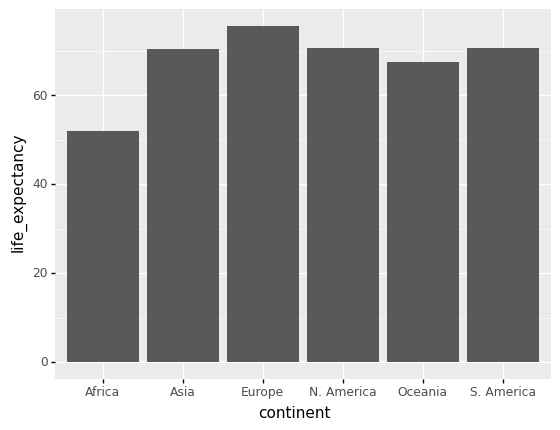

<ggplot: (322494702)>

In [91]:
import numpy as np

(
    ggplot(df)
    + aes(x='continent', y='life_expectancy')
    + geom_bar(stat='summary', fun_y=np.median)
)

## Aggregate bar chart (count)

Plotting a bar chart of counts is similar to how we did the median, but we use `stat='count'` instead of `stat='summary'`.

In [102]:
df = pd.read_csv('countries.csv')
df.head(2)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856


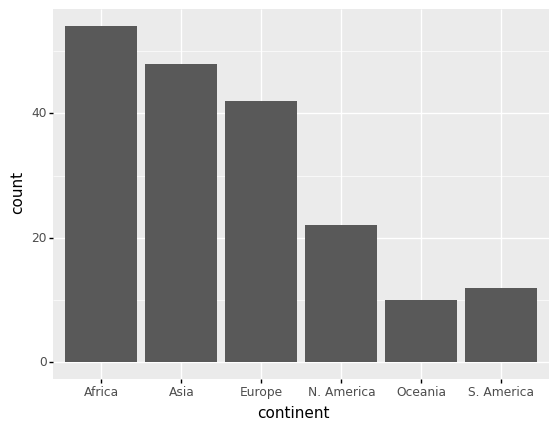

<ggplot: (324986974)>

In [104]:
(
    ggplot(df)
    + aes(x='continent')
    + geom_bar(stat='count')
)

## Horizontal bar charts

To make a horizontal bar graph, you just add `coord_flip()` to the end of your plot.

In [147]:
df = pd.DataFrame([
    { 'species': 'cat', 'num_animals': 8 },
    { 'species': 'dog', 'num_animals': 22 },
    { 'species': 'rabbit', 'num_animals': 2 },
])
df

,species,num_animals
0,cat,8
1,dog,22
2,rabbit,2


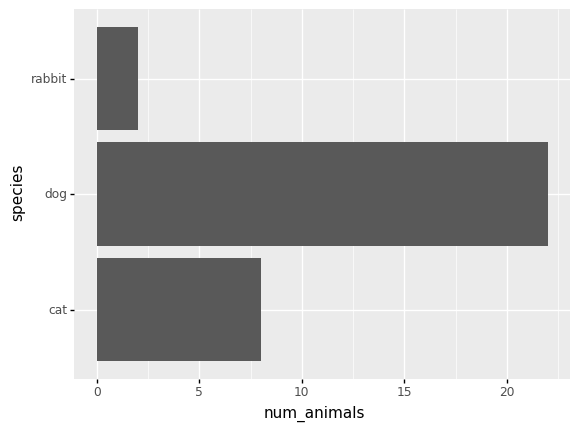

<ggplot: (325331706)>

In [148]:
(
    ggplot(df)
    + aes(x='species', y='num_animals')
    + geom_bar(stat='identity')
    + coord_flip()
)

## Sorting your bars

By defualt, `geom_bar` sorts based on alphabetical order. In order to sort your bars in plotnine, you need to use `reorder` when you're using `aes`.

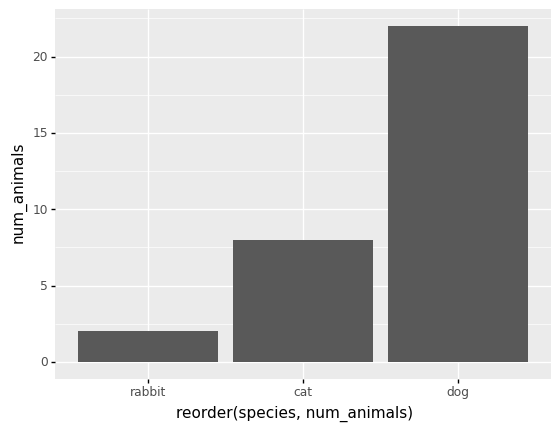

<ggplot: (325451499)>

In [152]:
(
    ggplot(df)
    + aes(x='reorder(species, num_animals)', y='num_animals')
    + geom_bar(stat='identity')
)

`x='reorder(species, num_animals)'` means "I want you to use `species` for the x axis, but I really want you to order it based on the `num_animals` column."

### Reversing your bar order

Instead of sorting with `num_animals`, you're going to sort with `-num_animals`, which I guess it's the ... subtracted negative version?

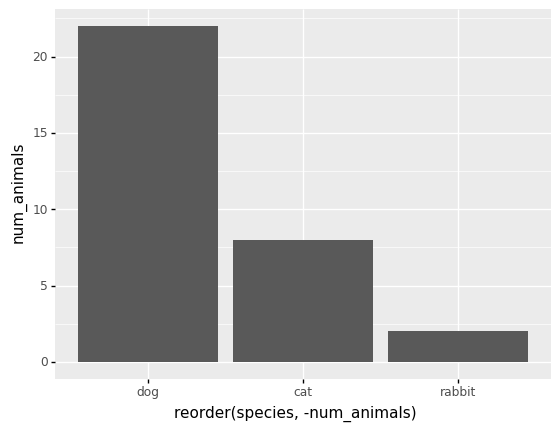

<ggplot: (325532546)>

In [155]:
(
    ggplot(df)
    + aes(x='reorder(species, -num_animals)', y='num_animals')
    + geom_bar(stat='identity')
)

## Stacked bar graph

To make a stacked bar graph, you use one of your columns to specify `fill`, which is the color of the bar. All of the filled bars get stacked next to each other.

In [173]:
df = pd.DataFrame([
    { 'species': 'cat', 'num_animals': 8, 'county': 'Kings' },
    { 'species': 'dog', 'num_animals': 22, 'county': 'Kings' },
    { 'species': 'cat', 'num_animals': 3, 'county': 'Queens' },
    { 'species': 'dog', 'num_animals': 2, 'county': 'Queens' },
])
df

,species,num_animals,county
0,cat,8,Kings
1,dog,22,Kings
2,cat,3,Queens
3,dog,2,Queens


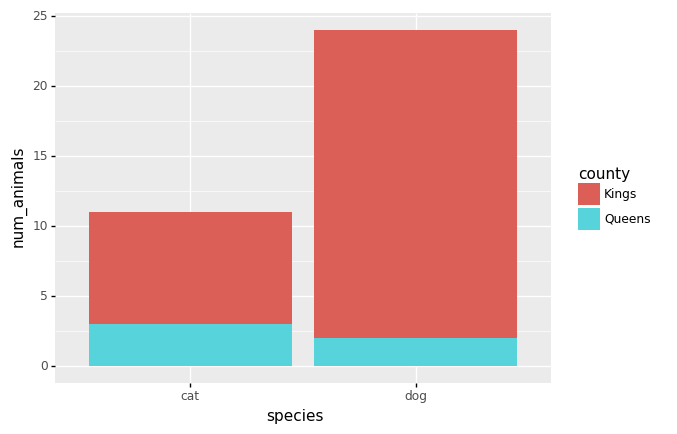

<ggplot: (322829960)>

In [174]:
(
    ggplot(df)
    + aes(x='species', y='num_animals', fill='county')
    + geom_bar(stat='identity')
)

## Grouped bar graph

To make a grouped bar graph, you'll specify a `fill` color in the aesthetics, then use `position='dodge'` along with your `geom_bar`.

In [170]:
df = pd.DataFrame([
    { 'species': 'cat', 'num_animals': 8, 'county': 'Kings' },
    { 'species': 'dog', 'num_animals': 22, 'county': 'Kings' },
    { 'species': 'cat', 'num_animals': 3, 'county': 'Queens' },
    { 'species': 'dog', 'num_animals': 2, 'county': 'Queens' },
])
df

,species,num_animals,county
0,cat,8,Kings
1,dog,22,Kings
2,cat,3,Queens
3,dog,2,Queens


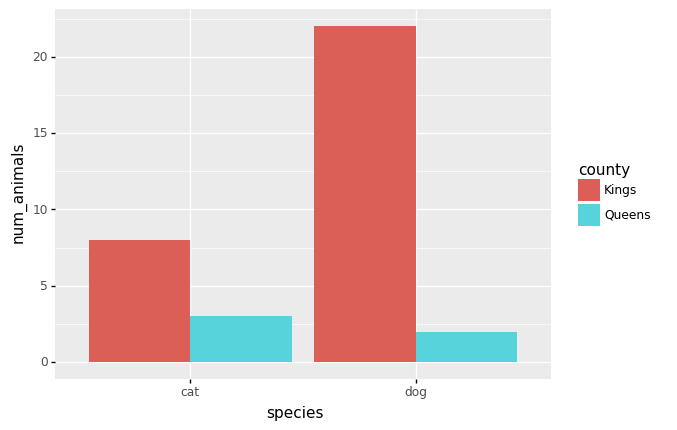

<ggplot: (324847595)>

In [171]:
(
    ggplot(df)
    + aes(x='species', y='num_animals', fill='county')
    + geom_bar(stat='identity', position='dodge')
)

### Extra spacing

You can also use `position='dodge2'`, which adds a little extra space. I think it does something else, too, but nothing I've read really makes sense so I unfortunately can't explain it to you.

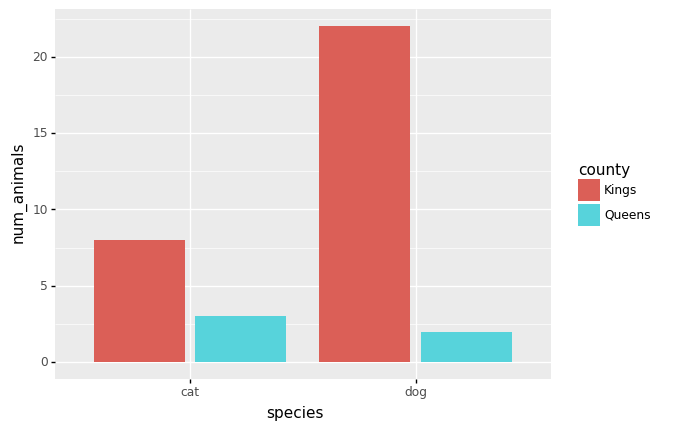

<ggplot: (322783726)>

In [172]:
(
    ggplot(df)
    + aes(x='species', y='num_animals', fill='county')
    + geom_bar(stat='identity', position='dodge2')
)

## 100% stacked bar graph

For a 100% stacked bar, you'll change the position of `geom_bar` to `fill`.

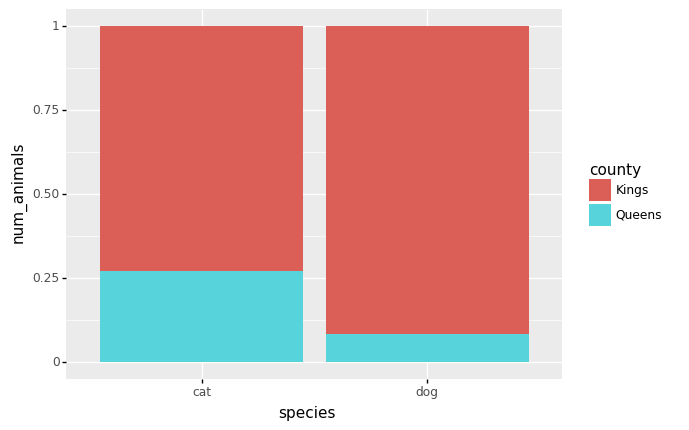

<ggplot: (323090249)>

In [178]:
(
    ggplot(df)
    + aes(x='species', y='num_animals', fill='county')
    + geom_bar(stat='identity', position='fill')
)